In [182]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')

In [183]:
df=pd.read_excel('Backache.xlsx')
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
515,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Abnormal
516,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Abnormal
517,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Abnormal
518,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Abnormal


In [184]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [185]:
df.shape

(520, 7)

In [186]:
df.index

RangeIndex(start=0, stop=520, step=1)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          520 non-null    float64
 1   pelvic_tilt               520 non-null    float64
 2   lumbar_lordosis_angle     520 non-null    float64
 3   sacral_slope              520 non-null    float64
 4   pelvic_radius             520 non-null    float64
 5   degree_spondylolisthesis  520 non-null    float64
 6   class                     520 non-null    object 
dtypes: float64(6), object(1)
memory usage: 28.6+ KB


In [188]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [189]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [190]:
df.nunique()

pelvic_incidence            310
pelvic_tilt                 310
lumbar_lordosis_angle       280
sacral_slope                281
pelvic_radius               310
degree_spondylolisthesis    310
class                         4
dtype: int64

In [191]:
print('before drop duplicates: ',df.shape)
df=df.drop_duplicates()
print('after drop duplicates: ',df.shape)

before drop duplicates:  (520, 7)
after drop duplicates:  (520, 7)


In [192]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 520 observations with 7 features.


array([[<AxesSubplot:title={'center':'pelvic_incidence'}>,
        <AxesSubplot:title={'center':'pelvic_tilt'}>,
        <AxesSubplot:title={'center':'lumbar_lordosis_angle'}>,
        <AxesSubplot:title={'center':'sacral_slope'}>,
        <AxesSubplot:title={'center':'pelvic_radius'}>,
        <AxesSubplot:title={'center':'degree_spondylolisthesis'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

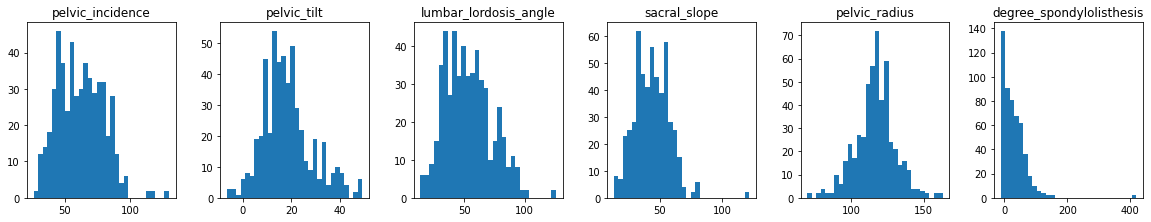

In [193]:
df.hist(figsize=(20,20), grid=False, layout=(5, 6), bins = 30)

In [194]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

In [195]:
numerical_features

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

In [196]:
categorical_features

Index(['class'], dtype='object')

In [197]:
skew_values = skew(df[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
5,degree_spondylolisthesis,4.184912
3,sacral_slope,0.735188
1,pelvic_tilt,0.620183
2,lumbar_lordosis_angle,0.480664
0,pelvic_incidence,0.415022
4,pelvic_radius,-0.065080


In [198]:
label_encoder= LabelEncoder()

In [199]:
df['class']=label_encoder.fit_transform(df['class'])
df['class'].unique()

array([1, 3, 2, 0])

<AxesSubplot:xlabel='class', ylabel='count'>

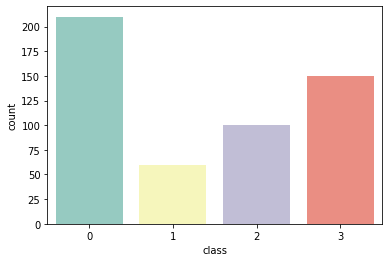

In [200]:
sns.countplot(x = 'class', data = df, palette="Set3")

In [201]:
corr=df.corr()

<AxesSubplot:>

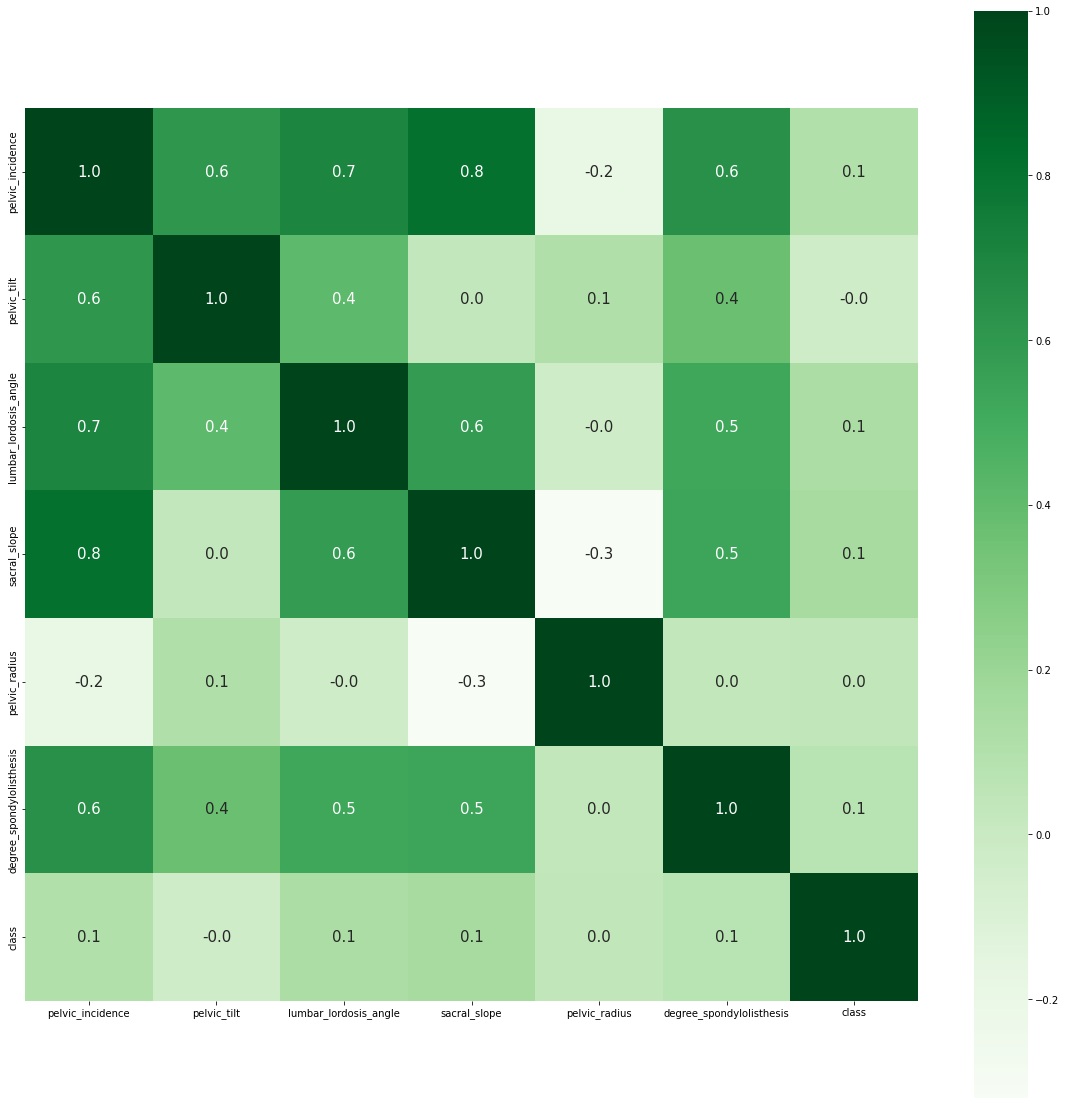

In [202]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

<AxesSubplot:>

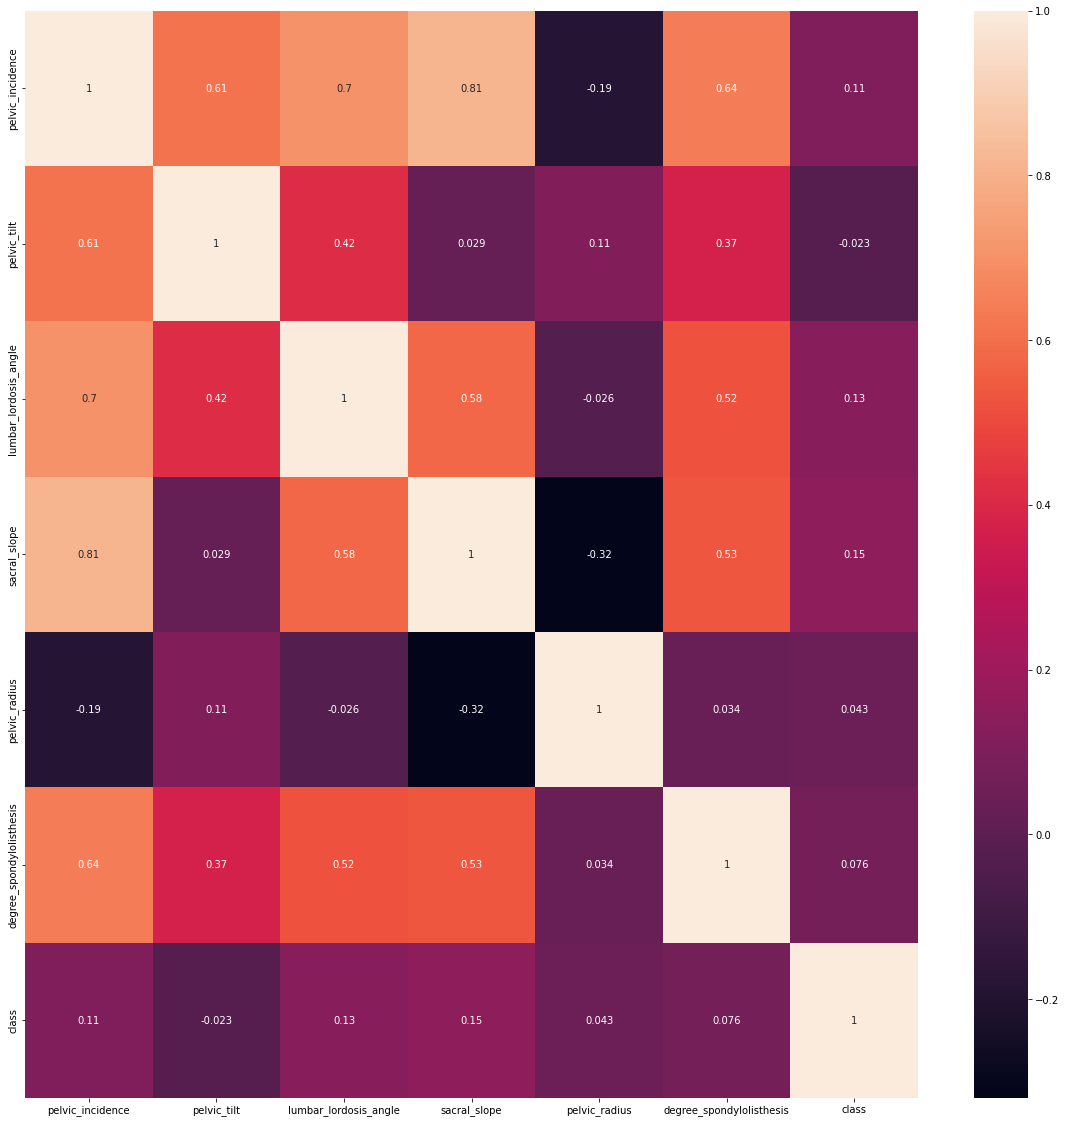

In [203]:
import seaborn as sb

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [204]:
df.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.609295,0.704841,0.810391,-0.188173,0.641340,0.105551
pelvic_tilt,0.609295,1.000000,0.417068,0.029190,0.111687,0.373624,-0.022893
lumbar_lordosis_angle,0.704841,0.417068,1.000000,0.580351,-0.026300,0.524030,0.132381
sacral_slope,0.810391,0.029190,0.580351,1.000000,-0.319732,0.532402,0.149971
pelvic_radius,-0.188173,0.111687,-0.026300,-0.319732,1.000000,0.033838,0.043301
degree_spondylolisthesis,0.641340,0.373624,0.524030,0.532402,0.033838,1.000000,0.076308
class,0.105551,-0.022893,0.132381,0.149971,0.043301,0.076308,1.000000


<AxesSubplot:>

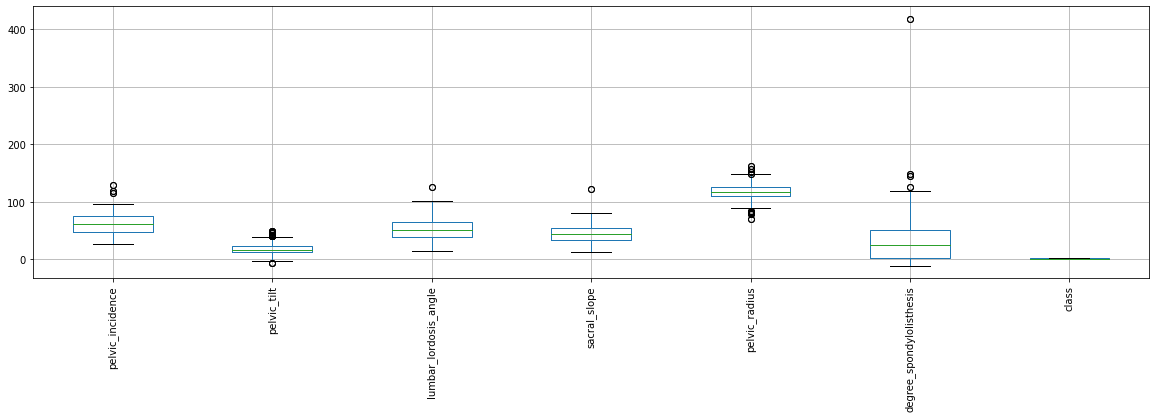

In [205]:
df.boxplot( rot = 90, figsize=(20,5))

In [206]:
df=df[df['degree_spondylolisthesis']>0]
df.shape

(443, 7)

In [207]:
df=round(df,2)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
1,39.06,10.06,25.02,29.00,114.41,4.56,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
5,40.25,13.92,25.12,26.33,130.33,2.23,1
6,53.43,15.86,37.17,37.57,120.57,5.99,1
...,...,...,...,...,...,...,...
515,80.11,33.94,85.10,46.17,125.59,100.29,0
516,95.48,46.55,59.00,48.93,96.68,77.28,0
517,74.09,18.82,76.03,55.27,128.41,73.39,0
518,87.68,20.37,93.82,67.31,120.94,76.73,0


In [208]:
print('before drop duplicates: ',df.shape)
df=df.drop_duplicates()
print('after drop duplicates: ',df.shape)

before drop duplicates:  (443, 7)
after drop duplicates:  (443, 7)


In [209]:
from scipy.stats import pearsonr,spearmanr
L=[]
for i in df.columns:
    pearsonCor,_=pearsonr(df[i],df['class'])
    L.append(pearsonCor)
    print(i,' - pearsonCor={}'.format(pearsonCor))

pelvic_incidence  - pearsonCor=0.10959124127283477
pelvic_tilt  - pearsonCor=0.0033624581901098914
lumbar_lordosis_angle  - pearsonCor=0.12456329375293664
sacral_slope  - pearsonCor=0.1343922545654557
pelvic_radius  - pearsonCor=0.018688993332864626
degree_spondylolisthesis  - pearsonCor=0.06953673705796622
class  - pearsonCor=1.0


In [210]:
L.sort(reverse=True)
L

[1.0,
 0.1343922545654557,
 0.12456329375293664,
 0.10959124127283477,
 0.06953673705796622,
 0.018688993332864626,
 0.0033624581901098914]

In [211]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.5)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

pelvic_incidence            26.540
pelvic_tilt                 11.890
lumbar_lordosis_angle       26.000
sacral_slope                20.145
pelvic_radius               16.165
degree_spondylolisthesis    47.800
class                        3.000
dtype: float64

In [212]:
#show outlier data
Upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
1               False        False                  False         False   
3               False        False                  False         False   
4               False        False                  False         False   
5               False        False                  False         False   
6               False        False                  False         False   
..                ...          ...                    ...           ...   
515             False        False                  False         False   
516             False         True                  False         False   
517             False        False                  False         False   
518             False        False                  False         False   
519             False        False                  False         False   

     pelvic_radius  degree_spondylolisthesis  class  
1            False                     False 

In [213]:
from sklearn.preprocessing import scale,StandardScaler,normalize,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

ardata=normalize(df,norm='l2',axis=0)
ardata = StandardScaler().fit(ardata).transform(ardata)
ardata=MinMaxScaler(feature_range=(0,1)).fit_transform(ardata)
DFdata=pd.DataFrame(ardata,columns=df.columns)
labels = DFdata['class']
data=DFdata.drop('class',axis=1)
labels = label_encoder.fit_transform(labels)

In [214]:
from sklearn.linear_model import Lasso

ls=Lasso(alpha=0.1,normalize=True)
ls.fit(data,labels)

z=ls.coef_
z

array([0., 0., 0., 0., 0., 0.])

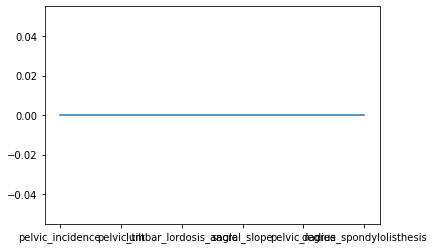

In [215]:
plt.plot(data.columns,z)
plt.show()

In [216]:
X = data  
y = labels

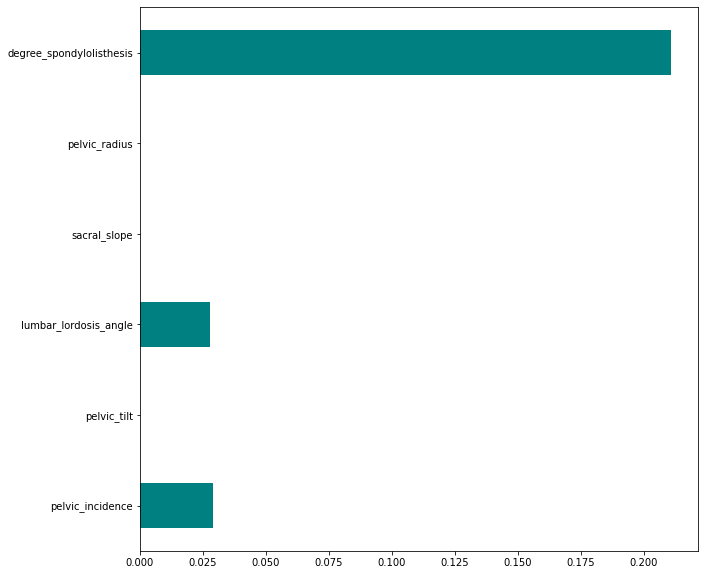

In [217]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X,y)
feat_importances=pd.Series(importance,df.columns[0:len(df.columns)-1])
plt.figure(figsize=(10,10))
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [218]:
feat_importances

pelvic_incidence            0.029172
pelvic_tilt                 0.000000
lumbar_lordosis_angle       0.027839
sacral_slope                0.000000
pelvic_radius               0.000000
degree_spondylolisthesis    0.210998
dtype: float64

In [219]:
L=list(feat_importances)
L.sort(reverse=True)
L

[0.21099781697084152,
 0.029172169401332937,
 0.027839199269165782,
 0.0,
 0.0,
 0.0]

In [220]:
data=df[['degree_spondylolisthesis','pelvic_incidence','lumbar_lordosis_angle']]
X=data

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 3)
(89, 3)
(354,)
(89,)


In [222]:
from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(326, 3) (326,)


In [223]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [224]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

#from sklearn.linear_model import LogisticRegression
tree=DecisionTreeClassifier()
rfe = RFE(tree,n_features_to_select=3, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
tree.fit(X_train_rfe,y_train)
y_predict=tree.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.6779141104294478 
 MAE  =2.3098159509202456 
 confusion_matrix=
[[137   0   0   0]
 [ 24   8   0   0]
 [  0   0  50   0]
 [ 81   0   0  26]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.57      1.00      0.72       137
           1       1.00      0.25      0.40        32
           2       1.00      1.00      1.00        50
           3       1.00      0.24      0.39       107

    accuracy                           0.68       326
   macro avg       0.89      0.62      0.63       326
weighted avg       0.82      0.68      0.62       326



In [225]:
from sklearn.linear_model import LogisticRegression

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
lr=LogisticRegression(C=0.1, solver='liblinear')
rfe = RFE(lr,n_features_to_select=3, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
lr.fit(X_train_rfe,y_train)
y_predict=lr.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.48466257668711654 
 MAE  =3.374233128834356 
 confusion_matrix=
[[79  2 17 39]
 [13  3 16  0]
 [11  3 36  0]
 [67  0  0 40]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.46      0.58      0.51       137
           1       0.38      0.09      0.15        32
           2       0.52      0.72      0.61        50
           3       0.51      0.37      0.43       107

    accuracy                           0.48       326
   macro avg       0.47      0.44      0.42       326
weighted avg       0.48      0.48      0.46       326



In [226]:
from sklearn.feature_selection import RFE
from sklearn import svm

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

nb = svm.SVC(kernel='rbf')
nb.fit(X_train, y_train) 

rfe = RFE(nb,n_features_to_select=4, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
nb.fit(X_train_rfe,y_train)
y_predict=nb.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.5030674846625767 
 MAE  =3.1901840490797544 
 confusion_matrix=
[[108   4  11  14]
 [ 19   6   7   0]
 [ 15   4  31   0]
 [ 86   0   2  19]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.47      0.79      0.59       137
           1       0.43      0.19      0.26        32
           2       0.61      0.62      0.61        50
           3       0.58      0.18      0.27       107

    accuracy                           0.50       326
   macro avg       0.52      0.44      0.43       326
weighted avg       0.52      0.50      0.46       326



In [227]:
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

classifier = GaussianNB() 

rfe = RFE(classifier,n_features_to_select=4, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
classifier.fit(X_train_rfe,y_train)
y_predict=classifier.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.4754601226993865 
 MAE  =3.208588957055215 
 confusion_matrix=
[[40 23  9 65]
 [ 1 26  5  0]
 [ 8 21 21  0]
 [38  0  1 68]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.46      0.29      0.36       137
           1       0.37      0.81      0.51        32
           2       0.58      0.42      0.49        50
           3       0.51      0.64      0.57       107

    accuracy                           0.48       326
   macro avg       0.48      0.54      0.48       326
weighted avg       0.49      0.48      0.46       326



In [228]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,100):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    Result=model.score(X_test,y_test)
    print(f"neighbors : {i} , score : {Result}")

neighbors : 1 , score : 0.15730337078651685
neighbors : 2 , score : 0.29213483146067415
neighbors : 3 , score : 0.19101123595505617
neighbors : 4 , score : 0.29213483146067415
neighbors : 5 , score : 0.21348314606741572
neighbors : 6 , score : 0.29213483146067415
neighbors : 7 , score : 0.2247191011235955
neighbors : 8 , score : 0.3258426966292135
neighbors : 9 , score : 0.30337078651685395
neighbors : 10 , score : 0.3146067415730337
neighbors : 11 , score : 0.33707865168539325
neighbors : 12 , score : 0.25842696629213485
neighbors : 13 , score : 0.30337078651685395
neighbors : 14 , score : 0.3146067415730337
neighbors : 15 , score : 0.3595505617977528
neighbors : 16 , score : 0.3595505617977528
neighbors : 17 , score : 0.3258426966292135
neighbors : 18 , score : 0.33707865168539325
neighbors : 19 , score : 0.3707865168539326
neighbors : 20 , score : 0.3258426966292135
neighbors : 21 , score : 0.3595505617977528
neighbors : 22 , score : 0.3595505617977528
neighbors : 23 , score : 0.348

The accuracy of KNN is:  0.48
[[32  0  1  5]
 [ 4  0  3  0]
 [ 6  0  3  0]
 [27  0  0  8]]
              precision    recall  f1-score   support

           0       0.46      0.84      0.60        38
           1       0.00      0.00      0.00         7
           2       0.43      0.33      0.38         9
           3       0.62      0.23      0.33        35

    accuracy                           0.48        89
   macro avg       0.38      0.35      0.33        89
weighted avg       0.48      0.48      0.42        89



<AxesSubplot:>

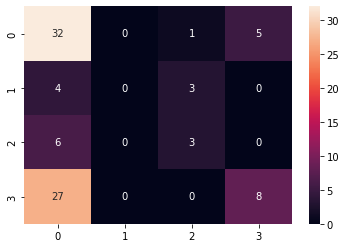

In [229]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=99)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
#print('y_predict={} \n y_test  ={}'.format(y_pred,y_test))
ac = accuracy_score(y_test,y_pred)
print('The accuracy of KNN is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
sns.heatmap(cm,annot=True)

In [230]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,20):
    classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state=4)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    ac=metrics.accuracy_score(y_test, y_pred)
    print('The accuracy of Decision Tree Classification is: ', round(ac,2),'i=',i)

The accuracy of Decision Tree Classification is:  0.42 i= 1
The accuracy of Decision Tree Classification is:  0.43 i= 2
The accuracy of Decision Tree Classification is:  0.46 i= 3
The accuracy of Decision Tree Classification is:  0.44 i= 4
The accuracy of Decision Tree Classification is:  0.42 i= 5
The accuracy of Decision Tree Classification is:  0.37 i= 6
The accuracy of Decision Tree Classification is:  0.35 i= 7
The accuracy of Decision Tree Classification is:  0.35 i= 8
The accuracy of Decision Tree Classification is:  0.34 i= 9
The accuracy of Decision Tree Classification is:  0.27 i= 10
The accuracy of Decision Tree Classification is:  0.26 i= 11
The accuracy of Decision Tree Classification is:  0.24 i= 12
The accuracy of Decision Tree Classification is:  0.22 i= 13
The accuracy of Decision Tree Classification is:  0.21 i= 14
The accuracy of Decision Tree Classification is:  0.19 i= 15
The accuracy of Decision Tree Classification is:  0.19 i= 16
The accuracy of Decision Tree Cla

The accuracy of Decision Tree Classification is:  0.46
[[ 2  8  2 26]
 [ 0  6  1  0]
 [ 0  3  6  0]
 [ 7  0  1 27]]
              precision    recall  f1-score   support

           0       0.22      0.05      0.09        38
           1       0.35      0.86      0.50         7
           2       0.60      0.67      0.63         9
           3       0.51      0.77      0.61        35

    accuracy                           0.46        89
   macro avg       0.42      0.59      0.46        89
weighted avg       0.38      0.46      0.38        89



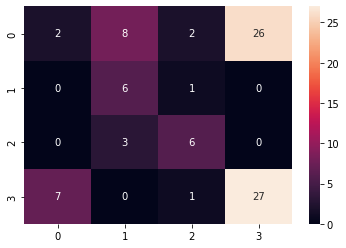

In [235]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Decision Tree Classification is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Logistic Regression is:  0.52
[[24  2  2 10]
 [ 3  1  3  0]
 [ 1  0  8  0]
 [21  0  1 13]]
              precision    recall  f1-score   support

           0       0.49      0.63      0.55        38
           1       0.33      0.14      0.20         7
           2       0.57      0.89      0.70         9
           3       0.57      0.37      0.45        35

    accuracy                           0.52        89
   macro avg       0.49      0.51      0.47        89
weighted avg       0.52      0.52      0.50        89



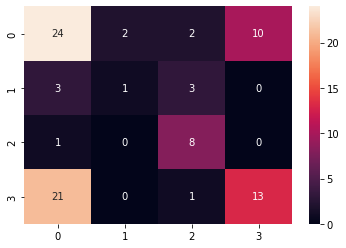

In [232]:
# Classification LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.9, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Logistic Regression is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

Accuracy of the SVM Model:  0.4
[[27  2  2  7]
 [ 4  0  3  0]
 [ 3  0  5  1]
 [30  0  1  4]]
              precision    recall  f1-score   support

           0       0.42      0.71      0.53        38
           1       0.00      0.00      0.00         7
           2       0.45      0.56      0.50         9
           3       0.33      0.11      0.17        35

    accuracy                           0.40        89
   macro avg       0.30      0.35      0.30        89
weighted avg       0.36      0.40      0.34        89



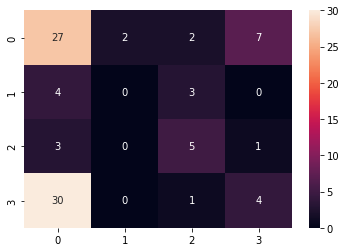

In [233]:
# Classification SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM Model: ",round(accuracy,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Naive bayes is:  0.4157303370786517
[[10  7  1 20]
 [ 0  4  3  0]
 [ 3  1  5  0]
 [16  0  1 18]]
              precision    recall  f1-score   support

           0       0.34      0.26      0.30        38
           1       0.33      0.57      0.42         7
           2       0.50      0.56      0.53         9
           3       0.47      0.51      0.49        35

    accuracy                           0.42        89
   macro avg       0.41      0.48      0.43        89
weighted avg       0.41      0.42      0.41        89



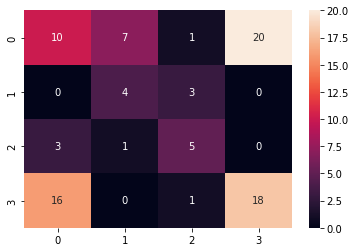

In [234]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('The accuracy of Naive bayes is: ', ac)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))